In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 3 Method

## 3.1 The Noise Model

In [36]:
# 定数
alpha = 0.5    # quantum efficiency factor
gain = 10      # analog gain
imgsize = (100, 600, 800)   # 枚数,縦,横
sigma_d = 5
sigma_r = 5

[[  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 ...
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]
 [  0   1   2 ... 797 798 799]]


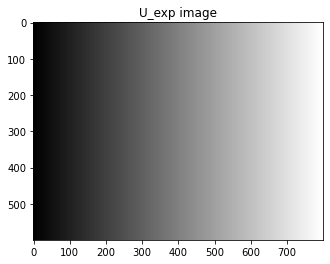

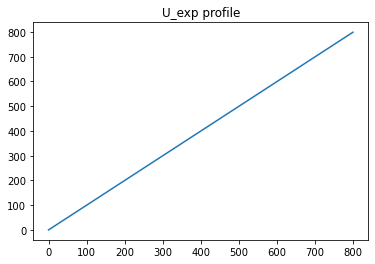

(100, 600, 800)


In [37]:
# expected number of photons hitting the pixel area
U_exp = np.tile(np.arange(0,imgsize[2]),(imgsize[0],imgsize[1],1))
print(U_exp[0])
plt.title('U_exp image')
plt.imshow(U_exp[0], 'gray')
plt.show()
plt.title('U_exp profile')
plt.plot(U_exp[0,0,:])
plt.show()
print(U_exp.shape)

[[   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 ...
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]
 [   0.    5.   10. ... 3985. 3990. 3995.]]


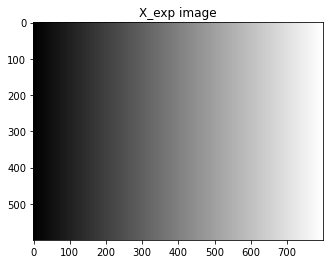

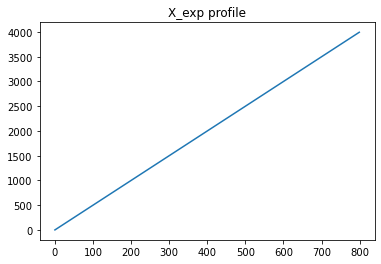

In [38]:
# Eqn.(1)
X_exp = gain * alpha * U_exp
print(X_exp[0])
plt.title('X_exp image')
plt.imshow(X_exp[0], 'gray')
plt.show()
plt.title('X_exp profile')
plt.plot(X_exp[0,0,:])
plt.show()

[[  0   2   1 ... 824 780 806]
 [  0   3   1 ... 743 778 854]
 [  0   2   3 ... 798 838 821]
 ...
 [  0   4   2 ... 828 786 785]
 [  0   0   4 ... 768 783 795]
 [  0   0   0 ... 739 789 815]]


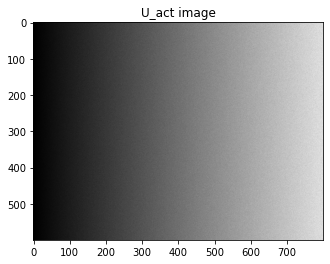

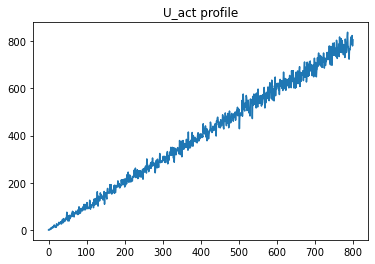

In [39]:
# Eqn.(3)
U_act = np.random.poisson(U_exp) # actual collected amount of photons
print(U_act[0])
plt.title('U_act image')
plt.imshow(U_act[0], 'gray')
plt.show()
plt.title('U_act profile')
plt.plot(U_act[0,0,:])
plt.show()

In [74]:
# Eqn.(5) 置換
k = gain * alpha
sigma2 = gain**2 * sigma_d**2 + sigma_r**2
print(f'k:{k},sigma2:{sigma2}')

k:5.0,sigma2:2525


[[   0.   10.    5. ... 3920. 3840. 4125.]
 [   0.    0.    5. ... 4035. 3940. 3875.]
 [   0.   15.   10. ... 3895. 3750. 4000.]
 ...
 [   0.    0.    5. ... 3960. 4065. 4055.]
 [   0.    5.    5. ... 3895. 4065. 3955.]
 [   0.   10.   10. ... 3850. 4190. 4150.]]


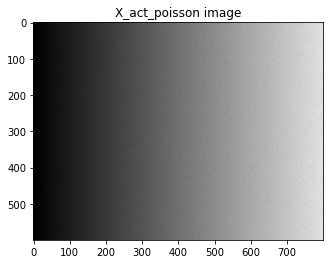

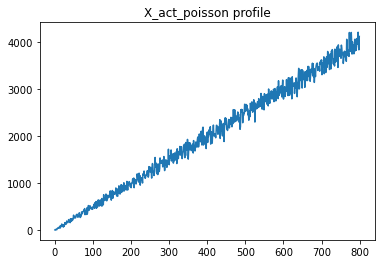

In [41]:
# Eqn.(5) ポアソンノイズの項
X_act_poisson = k * np.random.poisson(X_exp / k)
print(X_act_poisson[0])
plt.title('X_act_poisson image')
plt.imshow(X_act_poisson[0], 'gray')
plt.show()
plt.title('X_act_poisson profile')
plt.plot(X_act_poisson[0,0,:])
plt.show()

[[-146.94130468   -1.76217289    1.14464095 ...  -15.74283921
    -5.06796632    1.93134685]
 [  47.99940954   54.59457515  -30.31160385 ...   -8.93190238
    37.05383015   11.50159524]
 [ -10.6174535   108.78553423    8.60637307 ...   19.53385407
    52.9793394   129.29099008]
 ...
 [  44.30188761   -1.63755112   79.8426511  ... -107.95622396
   -50.30592636  -54.18740024]
 [ -61.8777943   -17.5672067   -63.95428781 ...   68.38695232
    52.65379994  -89.85365907]
 [  59.76062837   15.74047225   19.10528945 ...   64.1979285
   -60.56658286  -29.74738789]]


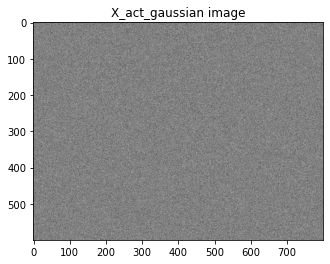

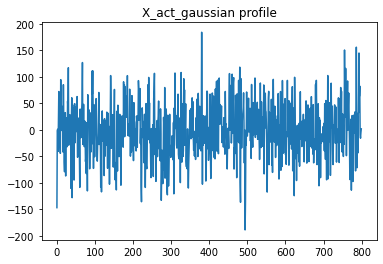

In [42]:
# Eqn.(5) ガウシアンノイズの項
X_act_gaussian = np.random.normal(0, np.sqrt(sigma2), imgsize)
print(X_act_gaussian[0])
plt.title('X_act_gaussian image')
plt.imshow(X_act_gaussian[0], 'gray')
plt.show()
plt.title('X_act_gaussian profile')
plt.plot(X_act_gaussian[0,0,:])
plt.show()

[[-1.46941305e+02  8.23782711e+00  6.14464095e+00 ...  3.90425716e+03
   3.83493203e+03  4.12693135e+03]
 [ 4.79994095e+01  5.45945752e+01 -2.53116038e+01 ...  4.02606810e+03
   3.97705383e+03  3.88650160e+03]
 [-1.06174535e+01  1.23785534e+02  1.86063731e+01 ...  3.91453385e+03
   3.80297934e+03  4.12929099e+03]
 ...
 [ 4.43018876e+01 -1.63755112e+00  8.48426511e+01 ...  3.85204378e+03
   4.01469407e+03  4.00081260e+03]
 [-6.18777943e+01 -1.25672067e+01 -5.89542878e+01 ...  3.96338695e+03
   4.11765380e+03  3.86514634e+03]
 [ 5.97606284e+01  2.57404722e+01  2.91052894e+01 ...  3.91419793e+03
   4.12943342e+03  4.12025261e+03]]


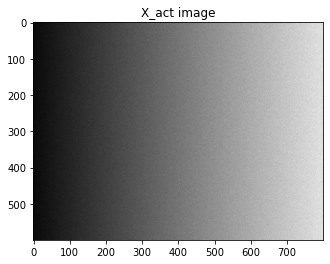

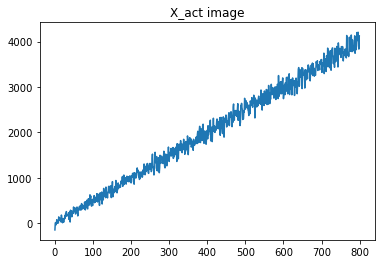

In [44]:
# Eqn.(5)
X_act = X_act_poisson + X_act_gaussian
print(X_act[0])
plt.title('X_act image')
plt.imshow(X_act[0], 'gray')
plt.show()
plt.title('X_act image')
plt.plot(X_act[0,0,:])
plt.show()

## 3.2 Parameter Estimation

0.022437230622342638


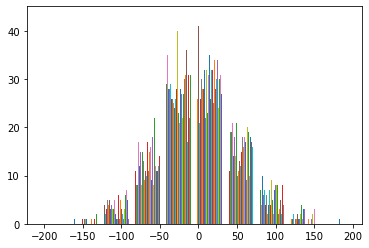

In [45]:
print(X_act[:,:,0].mean())
plt.hist(X_act[:,:,0])
plt.show()

[[-2.11463409e+00 -8.31880306e-01  1.57649840e+01 ...  3.97008225e+03
   4.01738196e+03  4.00568597e+03]
 [-1.12839726e+01  7.22251588e+00  5.51444588e+00 ...  3.98588840e+03
   3.97877555e+03  3.98127418e+03]
 [ 1.11951563e+00  1.23293616e+00  7.14757010e+00 ...  3.98899541e+03
   3.98236885e+03  3.98226742e+03]
 ...
 [-1.47192724e+00 -2.96482932e+00  1.43981020e+01 ...  3.97112799e+03
   3.98756786e+03  4.00587049e+03]
 [ 2.35229557e+00  1.40656513e+01  3.83988656e+00 ...  3.99818861e+03
   3.96153588e+03  4.02138490e+03]
 [ 5.53658161e-01  8.39727217e+00  1.03420278e+01 ...  3.98928826e+03
   3.97245731e+03  3.98869159e+03]]


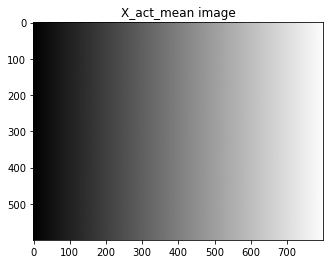

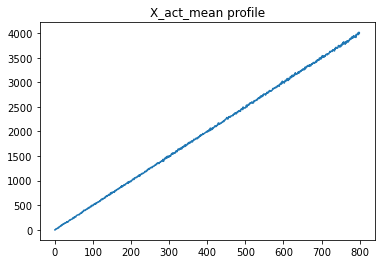

In [51]:
X_act_mean = np.mean(X_act, axis=0)
print(X_act_mean)
plt.title('X_act_mean image')
plt.imshow(X_act_mean, 'gray')
plt.show()
plt.title('X_act_mean profile')
plt.plot(X_act_mean[0,:])
plt.show()

(600, 800)
[[ 3086.29588187  2682.70222668  2389.4948586  ... 22515.129153
  17071.51999149 18303.44935757]
 [ 2661.81322502  2416.77817727  2540.30700908 ... 17683.60537596
  17657.65608634 29272.59674576]
 [ 2380.6934696   2272.55283543  2435.13778314 ... 24976.24803378
  21731.30901481 24204.80401805]
 ...
 [ 2193.95930324  2502.60281313  2619.02699741 ... 27072.81592212
  24404.76974762 27235.42464322]
 [ 2853.00306034  2300.12034786  2479.17115094 ... 27623.47267406
  30475.10582627 24729.73204742]
 [ 2347.91217743  2392.64716256  2355.36148101 ... 19595.86261989
  26645.64820396 17230.96777174]]


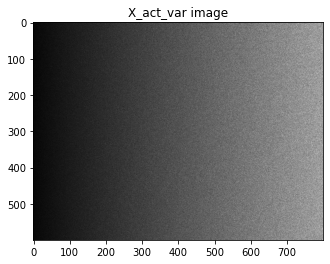

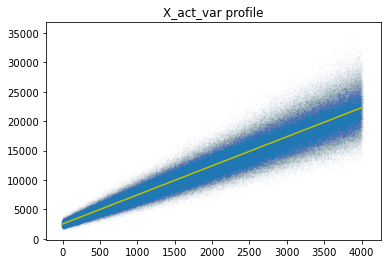

k:5.0,sigma2:2525
k_pred:4.950408424643312,sigma2_pred:2502.2678586919874


In [105]:
X_act_var = np.var(X_act, axis=(0))
print(X_act_var.shape)
print(X_act_var)
plt.title('X_act_var image')
plt.imshow(X_act_var, 'gray')
plt.show()
plt.title('X_act_var profile')
plt.scatter(X_act_mean.flatten(),X_act_var.flatten(),s=1,alpha=0.01)
config = np.polyfit(X_act_mean.flatten(),X_act_var.flatten(),1)
x = np.array([0,4000])
y = np.poly1d(config)(x)
plt.plot(x, y,'y')
plt.show()
print(f'k:{k},sigma2:{sigma2}')
print(f'k_pred:{config[0]},sigma2_pred:{config[1]}')